In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes

df = pd.read_csv('titles.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [64]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


## Getting a feel
Let's make some basic plots to get a feel for our data.

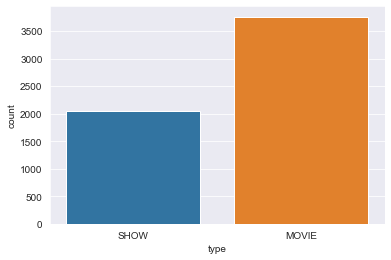

In [65]:
sns.countplot(data=df, x='type')
plt.show()

We're dealing mostly with movies in our dataset.

In [66]:
df['release_year'].value_counts()

2019    848
2020    805
2018    774
2021    758
2017    580
       ... 
1961      1
1953      1
1945      1
1968      1
1956      1
Name: release_year, Length: 67, dtype: int64

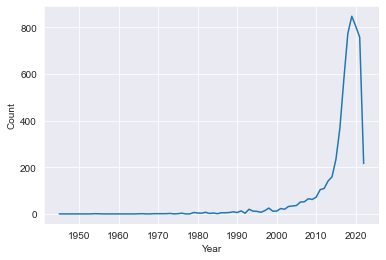

In [67]:
release_year_counts = df['release_year'].value_counts()
sns.lineplot(data=release_year_counts)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Our dataset seems to mainly contain TV shows and movies from more recent years.
## Analysis
An interesting thing to find out would be which genres tend to be the highest rated.

In [68]:
df['genres'].value_counts()

['comedy']                                                      510
['drama']                                                       350
['documentation']                                               320
['comedy', 'drama']                                             141
['drama', 'comedy']                                             128
                                                               ... 
['scifi', 'crime', 'drama', 'fantasy', 'horror', 'thriller']      1
['drama', 'romance', 'thriller', 'action', 'comedy']              1
['drama', 'romance', 'history', 'war']                            1
['fantasy', 'action', 'comedy']                                   1
['thriller', 'action', 'drama', 'war']                            1
Name: genres, Length: 1626, dtype: int64

It seems our dataset mostly contains movies or TV shows that are comedies, dramas, or documentations, so let's see how those compare in IMDB ratings.

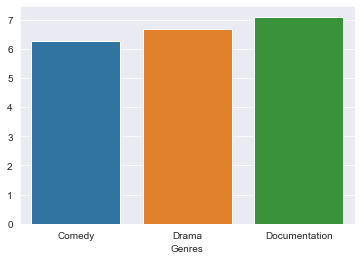

In [69]:
comedy = df[df['genres'] == "['comedy']"]
drama = df[df['genres'] == "['drama']"]
documentation = df[df['genres'] == "['documentation']"]
mean_values = [comedy['imdb_score'].mean(), drama['imdb_score'].mean(), documentation['imdb_score'].mean()]
genres = [0, 1, 2]
imdb_scores_plot: Axes = sns.barplot(x=genres, y=mean_values)
imdb_scores_plot.set_xlabel('Genres')
imdb_scores_plot.set_xticklabels(['Comedy', 'Drama', 'Documentation'])
imdb_scores_plot.set_ylabel('Average IMDB Score')
plt.show()

Of these three genres, it's clear that documentation is the highest rated on average, but since our dataset has less documentations than the other two genres, it's not exactly a fair comparison.